# SENTIMENT ANALYSIS

In [1]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sns.set_style('ticks')
plt.style.use('seaborn')

In [2]:
all_reviews = pd.read_pickle('./Data/all_reviews_clean.pkl')
all_reviews.head()

,date_of_stay,hotel_response,month_of_stay,nationality,review,source,trip_type,year_of_stay,review_clean
0,2010-01,NaN,January,Malaysia,Brunei” overall am satisfied as the hotel is ...,Agoda,Couple,2010,brunei overall be satisfy a the hotel be very ...
1,2010-01,NaN,January,Indonesia,great week-end at Mandarin Meritus” It's been ...,Agoda,Group,2010,great week end at mandarin meritus it s be alm...
2,2010-01,NaN,January,Malaysia,Favourite Hotel !” Mandarin Meritus has always...,Agoda,Business traveler,2010,favourite hotel mandarin meritus have always b...
3,2010-01,NaN,January,Malaysia,nice” very nice hotel. nice food and great roo...,Agoda,Couple,2010,nice very nice hotel nice food and great room ...
4,2010-01,NaN,January,Indonesia,"meritus orchard” Very nice hotel,location real...",Agoda,Couple,2010,meritus orchard very nice hotel location reall...


# TEXTBLOB

In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
# sub = lambda x: TextBlob(x).sentiment.subjectivity

all_reviews['TextBlob_Polarity'] = all_reviews['review'].apply(pol)
# all_reviews['TextBlob_Subjectivity'] = all_reviews['review'].apply(sub)

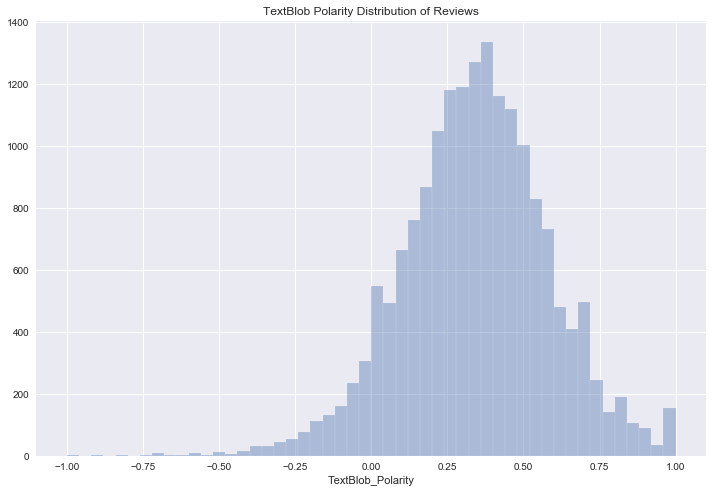

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(all_reviews['TextBlob_Polarity'], kde=False)
plt.title('TextBlob Polarity Distribution of Reviews')
plt.show()

# VADER

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [8]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    print("{}\n{}".format(sentence, str(score)))

In [9]:
vader_score = lambda x: analyser.polarity_scores(x)['compound']

all_reviews['vader_score'] = all_reviews['review'].apply(vader_score)

In [10]:
all_reviews.head(3)

,date_of_stay,hotel_response,month_of_stay,nationality,review,source,trip_type,year_of_stay,review_clean,TextBlob_Polarity,vader_score
0,2010-01,NaN,January,Malaysia,Brunei” overall am satisfied as the hotel is ...,Agoda,Couple,2010,brunei overall be satisfy a the hotel be very ...,0.275694,0.9708
1,2010-01,NaN,January,Indonesia,great week-end at Mandarin Meritus” It's been ...,Agoda,Group,2010,great week end at mandarin meritus it s be alm...,0.256061,0.9030
2,2010-01,NaN,January,Malaysia,Favourite Hotel !” Mandarin Meritus has always...,Agoda,Business traveler,2010,favourite hotel mandarin meritus have always b...,0.466077,0.9642


In [11]:
all_reviews.to_pickle('./Data/all_reviews_clean_sentiment.pkl')